This document presents a step-by-step tutorial on how to use the Python program ```AntabGMVA```. The program is designed to manage metadata of the Global mm-VLBI Array (GMVA) observations: i.e., Tsys & Gain data in ANTAB files. However, any ANTAB files provided by other VLBI arrays but written in the same format as the GMVA ones, can also be processed with this program. ```AntabGMVA``` offers you various useful functions for extraction/inspection/visualization/correction of Tsys measurements in ANTAB file and finally combine all those results into one single "All-in-One" ANTAB file. Then, the GMVA users can just use this final product for the data calibration with AIPS or CASA (rPICARD). Weather data (i.e., WX files) can also be processed with this program, but only for merging all individual WX files into one single WX file like the All-in-One ANTAB file above. ```AntabGMVA``` is a very easy tool and it does not require a deep knowledge of Python. There should be no big problem for any Python beginners to use this program. I believe once you go through all the contents of this document, then you can fully understand how it works. The code is available at: [https://github.com/greendw/AntabGMVA](https://github.com/greendw/AntabGMVA).

%%latex
\begin{center}
\bigskip
\textbf{\Large Contents}
\end{center}


&emsp;[1. Summary of Functions](#Summary-of-Functions) \hfill 2&ensp;&ensp;&ensp;&ensp;&ensp;<br />

&emsp;[2. Key components of ANTAB](#Three-Key-components-of-ANTAB) \hfill 2&ensp;&ensp;&ensp;&ensp;&ensp;<br />

&emsp;[3. Step-by-Step Guide with real metadata](#Step-by-Step-Guide-with-real-metadata) \hfill 3&ensp;&ensp;&ensp;&ensp;&ensp;<br />

&emsp;&emsp;&emsp;[3.1 VLBA stations](#VLBA-stations) \hfill 4&ensp;&ensp;&ensp;&ensp;&ensp;<br />

&emsp;&emsp;&emsp;&emsp;&emsp;[3.1.1 Sorting out individual antennas](#Sorting-out-individual-antennas) \hfill 4&ensp;&ensp;&ensp;&ensp;&ensp;<br />

&emsp;&emsp;&emsp;&emsp;&emsp;[3.1.2 86GHz (3mm; Main)](#The-Main-band) \hfill 7&ensp;&ensp;&ensp;&ensp;&ensp;<br />

&emsp;&emsp;&emsp;&emsp;&emsp;[3.1.3 43GHz (7mm; Interleaved)](#The-Interleaved-band) \hfill 16&ensp;&ensp;&ensp;&ensp;&ensp;<br />

&emsp;&emsp;&emsp;[3.2 Non-VLBA stations (e.g., EU/KVN antennas)](#Non-VLBA-stations) \hfill 19&ensp;&ensp;&ensp;&ensp;&ensp;<br />

&emsp;&emsp;&emsp;[3.3 Special case](#Special-case) \hfill 27&ensp;&ensp;&ensp;&ensp;&ensp;<br />

&emsp;&emsp;&emsp;&emsp;&emsp;[3.3.1 NOEMA (NN)](#NOEMA-(NN)) \hfill 28&ensp;&ensp;&ensp;&ensp;&ensp;<br />

&emsp;&emsp;&emsp;&emsp;&emsp;[3.3.2 GBT (GB)](#GBT-(GB)) \hfill 33&ensp;&ensp;&ensp;&ensp;&ensp;<br />

&emsp;&emsp;&emsp;&emsp;&emsp;[3.3.3 GLT (GL)](#GLT-(GL)) \hfill 42&ensp;&ensp;&ensp;&ensp;&ensp;<br />

&emsp;&emsp;&emsp;&emsp;&emsp;[3.3.4 ALMA (AA)](#ALMA-(AA)) \hfill 49&ensp;&ensp;&ensp;&ensp;&ensp;<br />

&emsp;&emsp;&emsp;[3.4 Final steps](#Final-steps) \hfill 54&ensp;&ensp;&ensp;&ensp;&ensp;<br />

&emsp;&emsp;&emsp;&emsp;&emsp;[3.4.1 Merging ANTABs](#Merging-ANTABs) \hfill 54&ensp;&ensp;&ensp;&ensp;&ensp;<br />

&emsp;&emsp;&emsp;&emsp;&emsp;[3.4.2 ANTAB cross-checking](#ANTAB-cross-checking) \hfill 56&ensp;&ensp;&ensp;&ensp;&ensp;<br />

&emsp;[4. Useful notes](#Useful-notes) \hfill 57&ensp;&ensp;&ensp;&ensp;&ensp;<br />

&emsp;&emsp;&emsp;[4.1 Some skippable inputs](#Some-skippable-inputs) \hfill 57&ensp;&ensp;&ensp;&ensp;&ensp;<br />

&emsp;&emsp;&emsp;[4.2 Navigate data with the pyplot window](#Navigate-data-with-the-pyplot-window) \hfill 57&ensp;&ensp;&ensp;&ensp;&ensp;<br />

&emsp;&emsp;&emsp;[4.3 Self-update](#Self-update) \hfill 57&ensp;&ensp;&ensp;&ensp;&ensp;<br />

&emsp;[5. Weather (WX) data](#Weather-(WX)-data) \hfill 58&ensp;&ensp;&ensp;&ensp;&ensp;<br />

&emsp;[6. Final remark](#Final-remark) \hfill 64&ensp;&ensp;&ensp;&ensp;&ensp;<br />


# Summary of Functions

In Python, more details of each function can be found with ```help(function)``` (see [Section 3.4.2](#ANTAB-cross-checking)) and ```help(self.function)``` for those under ```gentab```.

%%latex
\renewcommand{\arraystretch}{1.2}
\begin{center}
\begin{tabular}{l l}
\hline
Name ~&~ Description  \\
\hline
gentab ~&~ (class) consists of a number of key functions for the analyses of ANTAB.  \\
~~- readant ~&~ Read \& extract Tsys measurements from ANTAB file.  \\
~~- overview ~&~ Initial, quick inspection of Tsys values of a given station.  \\
~~- showsys ~&~ Generate plot/output text files of \textit{raw} Tsys values.  \\
~~- intpsys ~&~ Generate plot/output text files of \textit{linear-interpolated} Tsys values.  \\
~~- smthsys ~&~ Generate plot/output text files of \textit{smoothed} Tsys values.  \\
~~- cpifsys ~&~ Generate plot/output text files of \textit{copy-and-pasted} Tsys values.  \\
\hline
vlbaout ~&~ (class) Sorting out the data by each station and save as output .txt.  \\
\hline
sout ~&~ Sorting out the results into sub-directories (later for \texttt{allinone}).  \\
\hline
doublecheck ~&~ Generate a plot of selected data (self.tsys\#) or an output data file.  \\
\hline
linkses ~&~ Merge multiple sessions into one ANTAB file for a single station.  \\
\hline
allinone ~&~ Merge all ANTAB files of all stations into one single ANTAB file.  \\
\hline
wxgen ~&~ Generate one single WX file (weather information of all stations).  \\
\hline
writetxt ~&~ Write out a data list as output text file.  \\
\hline
newlog ~&~ Change to a new log file.  \\
\hline
\end{tabular}
\end{center}

# Three Key components of ANTAB

The final products (i.e., modified/corrected ANTAB files) will consist of the following three components. All those information can normally be found in raw ANTAB files. For some stations (e.g., GBT, NOEMA, PV, GLT, and etc.), however, you may need to contact the individual observatories or the MPIfR correlation team (see [https://github.com/greendw/AntabGMVA](https://github.com/greendw/AntabGMVA)) to obtain the Gain information (see below) if they are not included in the raw ANTAB files. The VLBA GAIN data can be found in [HERE](http://www.vlba.nrao.edu/astro/VOBS/astronomy/vlba_gains.key). **This tutorial assumes that you already have/know the three components of all the stations of your data.**

1. GAIN line  
<br>: It is a short single line with antenna code, gain curve type, DPFU (K/Jy), and POLY (i.e., coefficient values). For some antennas, the POLY parameter can be quite long due to multiple, long coefficients with many digits. An example of the GAIN line is as follow.  
(e.g., GAIN NN ELEV DPFU=0.414,0.415 POLY=1.0)

2. TSYS line  
<br>: It is also a short single line with antenna code, INDEX (i.e., IDs of Tsys columns), and some (optional) parameters. Depending on the individual stations with different technical settings, the INDEX can be quite long with many IFs of RCP and LCP. An example of the TSYS line is as follow.  
(e.g., TSYS EF INDEX='R1','R2','L1','L2')

3. Tsys measurements (main body)  
<br>: It is a large set of multiple data arrays including the Tsys values. In general, the first and second columns (from left-to-right) denote observing day (DAY) and timestamp (HH:MM), respectively. Then, the actual Tsys arrays begin from the third column: i.e., IF#1 Tsys, IF#2 Tsys, ..., IF#Nth Tsys. An example of a single line of the Tsys measurements is as follow.  
(e.g., 113 09:00.33 169.7 172.5 173.9 174.3)

# Step-by-Step Guide with real metadata

The GMVA array consists of many radio telescopes including the phased arrays (e.g., NOEMA and ALMA). The number of the stations that participate GMVA observations varies with different observing sessions, depending on PI's request, the availability of the individual stations (e.g., technical problems, maintenance, system upgrade, and sometimes lack of manpower), and weather conditions. But, it is normally expected that at least >14 antennas will join the observations. PI will receive the same number of ANTAB files as the total number of the participated stations; in the case of WX (weather) data, only for those stations which provide Tsys measurements not opacity-corrected. ANTAB file formats are quite diverse by the individual stations. But, one can categorize them into three types: (1) VLBA, (2) EU/KVN, and (3) special cases. Such a circumstance makes things (i.e., data inspection) tricky and difficult for PIs. This is the main motive for the development of ```AntabGMVA```.

This program operates on a terminal-based interactive mode. In this tutorial, we will use some of the real data obtained from previous GMVA sessions. All the example data used in this tutorial can be found in the GitHub repository [https://github.com/greendw/AntabGMVA](https://github.com/greendw/AntabGMVA).

Now, launch ```ipython``` (or ```ipython --pylab```).

In [ ]:
# Versions/type of Python, IPython
# confirmed matplotlib backends: Qt5Agg, tkagg
Python 3.8.10
IPython 7.27.0 -- An enhanced Interactive Python.

In [7]:
pwd

'/homes/dwkim/Desktop/AntabGMVA/JupyterNote/Examples/ANTAB'

>!! This path is going to be **the working directory** in this tutorial.

In [8]:
ls

c211acal.vlba    c211agl.antab     c211a-Nn-rcp.asc  mg006b.Aa.antab
c211aef.antabfs  c211a-Nn-lcp.asc  c212b_gb.an


>!! Place **all your ANTAB files** at the working directory.

In [9]:
import antabgmva as gmv


###################################
###################################
Log file name 
: testing

--> testing_0_LOG.txt


>!! Give a prefix for the log-file name. Find the log file in the working directory.


## VLBA stations

Here '```c211acal.vlba```' is a typical name of the VLBA ANTAB files in GMVA sessions. The '```~cal.vlba```' file includes all the metadata of the eight VLBA antennas (**BR**, **FD**, **KP**, **LA**, **MK**, **NL**, **OV**, and **PT**) that can join GMVA observations at 3mm; the other two VLBA antennas **SC** & **HN** cannot observe at 3mm. Here we are only interested in Tsys measurements and thus we need to extract the Tsys data from this file first. ```vlbaout``` will sort out the data by the antennas and save them as text files individually.

### Sorting out individual antennas

In [12]:
vlba = gmv.vlbaout()

c211acal.vlba
testing_0_LOG.txt
c211a-Nn-lcp.asc
c211a-Nn-rcp.asc
c211agl.antab
mg006b.Aa.antab
c211aef.antabfs
c212b_gb.an

###################################
###################################

***For VLBA, just follow the steps below***

________________________________________________________________________________      
Give the *~cal.vlba* file name (e.g., xxxxacal.vlba) 
: c211acal.vlba

________________________________________________________________________________      
Give session ID (e.g., a or b or c or ...) 
: a

The following bands are found.
['7mm', '3mm']

________________________________________________________________________________      
Observing frequency? (e.g., 3mm or 7mm or ...) 
: 3mm


... a_all_VLBA_raw.dat ! 


====Filtering out!====

...working on...  BR

...working on...  SC



!! No 3mm data found at --> SC !!


NOTICE: To stop this run, just Press CTRL+C or keep pressing ENTER.       
        But, for any wrong inputs for the headers appearing belo

In [13]:
vlba.HDgain

['GAIN BR ALTAZ DPFU=0.027,0.026 POLY=0.357,2.883E-02,-3.229E-04 /\n', 'None']

>!! The parameters can be double checked like above and if necessary, you can re-define them (e.g., ```vlba.HDgain[Nth Antenna] = 'A new GAIN line'```).

In [14]:
ls a_*

a_3mm_BR_vlbaout.antab  a_all_VLBA_raw.dat


>!! To make this document compact, the other antennas were removed from the input ANTAB file except BR and SC (= no 3mm data, but just as an example). Simply answer every question by giving input like above.  
As its name suggests ('c211**a**cal.vlba'), this data is '**a**' session/part of the GMVA 21A campaign (April 2021). The observing band is **86GHz** which is ~**3mm** (and 43GHz = ~7mm).  
At this point, you will have a first output file which is '```a_all_VLBA_raw.dat```'. This is just the whole Tsys part in the input raw VLBA ANTAB file. With this, you can easily check some basic information of the data (e.g., participated antennas, the TSYS lines, and the INDEX information) for all the VLBA antennas.  
We have just seen the following four questions: INDEX - TSYS - GAIN - POLY. You can input these information at this step like I did above. But, **you can also skip them for now by pressing the 'Enter' key**. Because you will need to do this again anyway when you begin to work on the individual ANTAB files of the VLBA antennas (e.g., '```a_3mm_BR_vlbaout.antab```', see below). You can also insert the TSYS/GAIN lines later separately via text editor.  
In this example, no output was made for SC because it is empty at 3mm.

### The Main band

Now, the MAIN part begins. Here only the **BR** station is shown, but the same process can be applied to any of the VLBA stations.

In [16]:
br = gmv.gentab('BR')


###################################
###################################
First, you need to understand observing setting of your data!

***Open up the antab file you want to work on, and answer the questions below***

________________________________________________________________________________      
Antab files separated by RCP and LCP? (e.g., yes/y or no/n; default = no) 
: 

________________________________________________________________________________      
How many Tsys columns are there?  -->  including all RCP and LCP 
(e.g., 16 or 8 or 4 or 2;  ...  **NOTE** e.g., 'R1:n' or 'R1|L1' --> one column) 
: 8

________________________________________________________________________________      
Select a number below for the Tsys order(IDs)            [***Must-Be-Given***]       

 1 - R1 R2 R3 R4 R5 R6 R7 R8 L1 L2 L3 L4 L5 L6 L7 L8       
 2 - R1:8 L1:8       
 3 - R1:2 L1:2 R3:4 L3:4 R5:6 L5:6 R7:8 L7:8       
 4 - R1 L1 R2 L2 R3 L3 R4 L4       
 5 - R1L1 R2L2 R3L3 R4L4 R5L5 R6

>!! If you are fine with the **default** setting (e.g., 'default = no' in the first question), then just press Enter. For this session (check out '```a_all_VLBA_raw.dat```' or '```a_3mm_BR_vlbaout.antab```'), both RCP and LCP data are in a single ANTAB file together. There are 8 Tsys columns in total (i.e., four RCPs + four LCPs).  
Note that in recent GMVA observations, bandwidth of each IF of the VLBA data is 128MHz, whereas it is 64MHz for other non-VLBA stations. In that case, each of the VLBA IFs can be split into two 64MHz subbands, thus indicated as **'R1:2'** and **'L1:2'**.

In [17]:
br.readant()

c211acal.vlba
testing_0_LOG.txt
a_all_VLBA_raw.dat
c211a-Nn-lcp.asc
c211a-Nn-rcp.asc
c211agl.antab
mg006b.Aa.antab
c211aef.antabfs
a_3mm_BR_vlbaout.antab
c212b_gb.an

Give antab file (e.g., c232aef.antabfs or a_3mm_BR_vlbaout.antab) 
: a_3mm_BR_vlbaout.antab

**DONE** 
..check self + tsys1       
////////////////////////////////////////////////////////////////////////////////


>!! Select and read raw ANTAB file. **A useful tip for copying-and-pasting a word/line**, is that (1) you can just select it with mouse dragging or double-clicking and then (2) move your mouse cursor to the place (prompt) where you will give the input. Lastly, (3) click the scroll button on your mouse.

In [18]:
br.overview()

-> 999 found!!
-> 999 found!!
-> 999 found!!
-> 999 found!!

***********************************RESULTS***********************************

--> R1:2 seems Fine. (BUT at least check the plot with 'showsys')

--> L1:2 with something Wrong! (check further with 'showsys')

--> R3:4 seems Fine. (BUT at least check the plot with 'showsys')

--> L3:4 with something Wrong! (check further with 'showsys')

--> R5:6 seems Fine. (BUT at least check the plot with 'showsys')

--> L5:6 with something Wrong! (check further with 'showsys')

--> R7:8 seems Fine. (BUT at least check the plot with 'showsys')

--> L7:8 with something Wrong! (check further with 'showsys')

**DONE** 
..check self + inich (for each IF, 0: Fine / 1: Unreasonable found)       
////////////////////////////////////////////////////////////////////////////////


>!! Quick look into the data before plotting. This step is optional, but quite useful to have a brief overview/expectation about your data.



... a_3mm_BR_Tsys1.png ! 



... a_3mm_BR_Tsys1.dat ! 


**DONE** 
..check self + tarr and the output files!       
////////////////////////////////////////////////////////////////////////////////


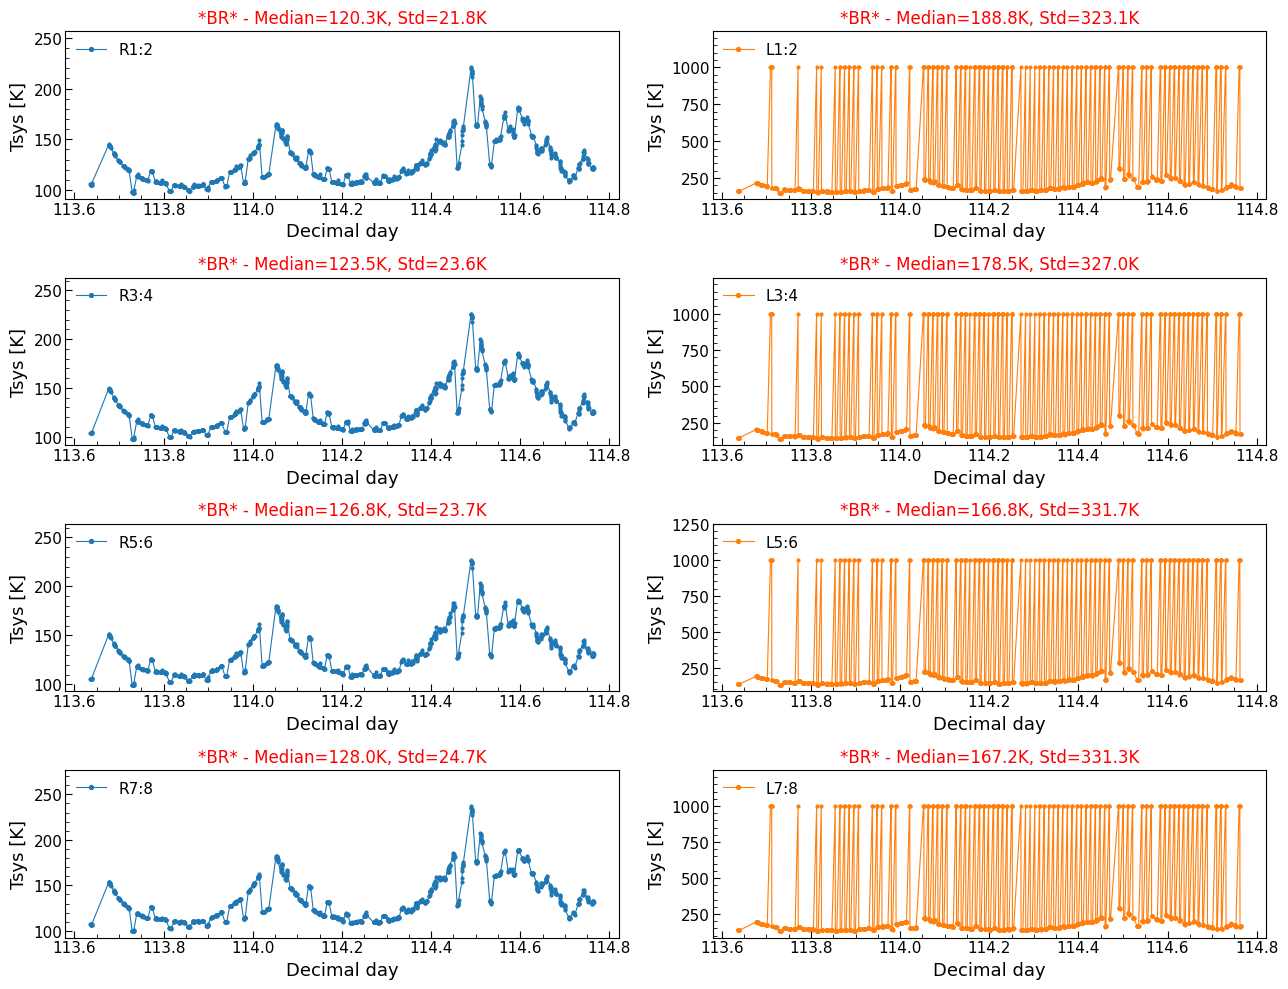

In [19]:
br.showsys(autosav=True, datout=True)

>!! Now, you see how the data look like. The LCP data (orange) obviously have erroneous values that should be corrected. **You can also change fontsize of various figure labels**: see ``help(self.showsys)``, which is ``help(br.showsys)`` in this case.  
The figure and data will be saved automatically in your working directory if you set ``autosav=True`` and ``datout=True``, respectively (i.e., '```a_3mm_BR_Tsys1.png```' and '```a_3mm_BR_Tsys1.dat```' in this case).


******************************************************************************** 
********************************************************************************      
...Erroneous can be... 
 -->  0 
 -->  Negative 
 -->  999.0 
 -->  >[User input] 
 -->  (optional) Between A and B       

(Press Enter and move on!) 


*Tsys column *R1:2* Cut-out above THIS threshold!* 
Give input or just Enter (default: 9999) 
: 

*Tsys column *R1:2* Cut-out Between A and B?* 
(yes/y or no/n/Enter; default = no) 
: 

No interpolation needed.

------------------------------------
R1:2 Number of Erroneous Tsys --> 0 !
------------------------------------

*Tsys column *L1:2* Cut-out above THIS threshold!* 
Give input or just Enter (default: 9999) 
: 

*Tsys column *L1:2* Cut-out Between A and B?* 
(yes/y or no/n/Enter; default = no) 
: 

Interpolation has been performed!!

------------------------------------
L1:2 Number of Erroneous Tsys --> 238 !
------------------------------------

*Tsys column *

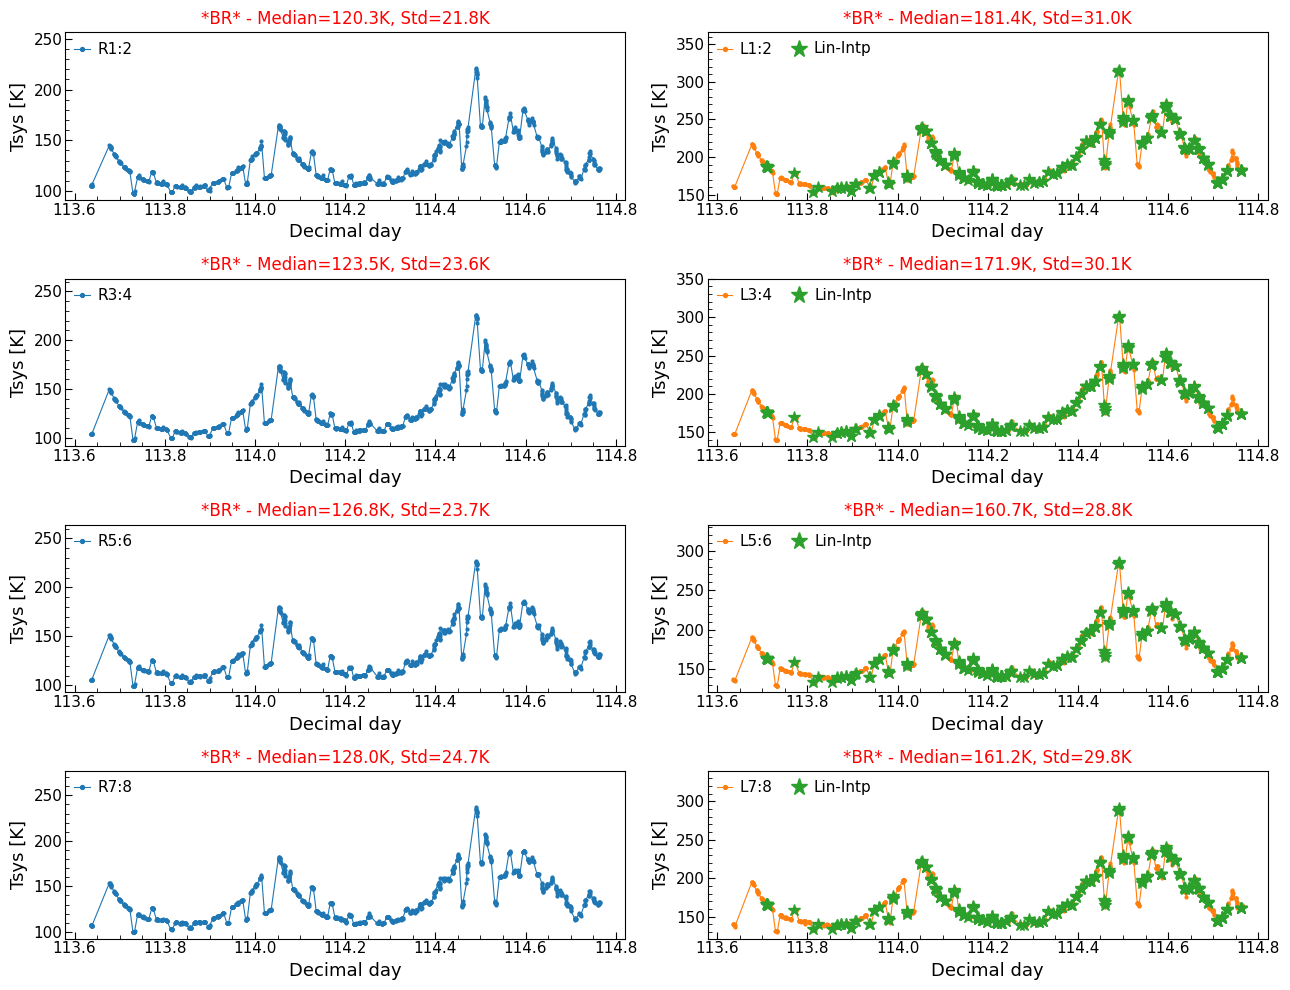


update is set 'True', self.tsys2 has been updated!

autosav is set 'False', thus no output .png file.

datout is set 'False', thus no output .dat file.

**DONE** 
..check self + tsys2 and the output files!       
////////////////////////////////////////////////////////////////////////////////


In [20]:
br.intpsys(whichdat=1)  
# input data: self.tsys1 (whichdat=1) / output data: self.tsys2 (whichdat=2)

>!! The **default settings** are generally fine for filtering out bad data: **(1) Negative, (2) Zero, (3) 999, and (4) above 9999**. Then any of these erroneous values will be replaced by reasonable values estimated by linear interpolation using those neighboring fine Tsys values.  
If needed, you can set some fine tunings in ``intpsys`` by giving inputs at the questions above. For each IF, users can change the upper threshold that is initially (4) above and/or add a new criterion which is a certain Tsys range (between A and B).  
Now, if you are satisfied with this result (i.e., the above plot), then export the result out by running ```intpsys``` again but this time including the two parameters: ``br.intpsys(whichdat=1, autosav=True, datout=True)``.  
The second run will generate '```a_3mm_BR_Tsys2.png```' and '```a_3mm_BR_Tsys2.dat```'.

In [25]:
ls

a_3mm_BR_Tsys1.dat  a_3mm_BR_vlbaout.antab  c211agl.antab     mg006b.Aa.antab
a_3mm_BR_Tsys1.png  a_all_VLBA_raw.dat      c211a-Nn-lcp.asc  testing_0_LOG.txt
a_3mm_BR_Tsys2.dat  c211acal.vlba           c211a-Nn-rcp.asc
a_3mm_BR_Tsys2.png  c211aef.antabfs         c212b_gb.an


>!! The results (i.e., .dat and .png files) have '```Tsys#```' in their names.  
 -- **Tsys1**: output from ```showsys```.  
 -- **Tsys2**: output from ```intpsys```.  
 -- **Tsys3**: output from ```smthsys```.  
 -- **Tsys4**: output from ```cpifsys```.

In [27]:
gmv.sout('BR', 2)


------------------------sorting out...

**DONE** 
The output files has been sorted out!    
////////////////////////////////////////////////////////////////////////////////


>!! Here the **version 2 (i.e., 'Tsys2')** is the final result. Check the two new folders that have been created by ```sout```.

In [29]:
ls

a_3mm_BR_vlbaout.antab  br/              c211agl.antab     c212b_gb.an
a_all_VLBA_raw.dat      c211acal.vlba    c211a-Nn-lcp.asc  mg006b.Aa.antab
allinone/               c211aef.antabfs  c211a-Nn-rcp.asc  testing_0_LOG.txt


>!! Once an ANTAB file is completed, now you need to run ```sout```. It is a very convenient way to sorting out the results. Later, you can create ***one single combined ANTAB file*** in this 'allinone' folder (i.e., so-called 'All-in-One' ANTAB file) that includes all the final products by using the function ```allinone```.  
**That's it. You just finished the BR antenna.** Here the final product (i.e., '```~Tsys2.dat```') can now be used in **AIPS** or **CASA**.

### The Interleaved band

GMVA sessions also have some 7mm interleaved scans depending on PI's request. But, they are only for VLBA stations; for the 7mm observations, total 10 VLBA antennas can participate. Here the example data (c211a session) also has the 7mm data. Let's check this out.

In [31]:
vlba7 = gmv.vlbaout()

c211acal.vlba
testing_0_LOG.txt
a_all_VLBA_raw.dat
c211a-Nn-lcp.asc
c211a-Nn-rcp.asc
c211agl.antab
mg006b.Aa.antab
c211aef.antabfs
a_3mm_BR_vlbaout.antab
c212b_gb.an

###################################
###################################

***For VLBA, just follow the steps below***

________________________________________________________________________________      
Give the *~cal.vlba* file name (e.g., xxxxacal.vlba) 
: c211acal.vlba

________________________________________________________________________________      
Give session ID (e.g., a or b or c or ...) 
: a

The following bands are found.
['7mm', '3mm']

________________________________________________________________________________      
Observing frequency? (e.g., 3mm or 7mm or ...) 
: 7mm


The output *raw* data file already exists...!


====Filtering out!====

...working on...  BR

...working on...  SC




NOTICE: To stop this run, just Press CTRL+C or keep pressing ENTER.       
        But, for any wrong inputs for

In [32]:
ls a_*

a_3mm_BR_vlbaout.antab  a_7mm_SC_vlbaout.antab
a_7mm_BR_vlbaout.antab  a_all_VLBA_raw.dat


>!! The 7mm VLBA data were recorded in a more complex form. There are **multiple bandwidths with different numbers of Tsys columns**: in this case, 2MHz with 4 Tsys columns, 64MHz with 2 Tsys columns, and 128MHz with 8 Tsys columns. As we have seen the 3mm data, however, here we consider the 128MHz with 8 columns as the correct ones (i.e., scans for science). Thus, select the correct one carefully (here '8' was given).  
Owing to this issue at 7mm, the four parameters (i.e., INDEX - TSYS - GAIN - POLY) were skipped for now, but they can be given later separately.  
For 7mm, SC is not empty and thus the following output can be found: '```a_7mm_SC_vlbaout.antab```'.

The rest of the steps are the same as the 3mm data shown above ([Section 3.1.2](#The-Main-band)).

## Non-VLBA stations

Here the Non-VLBA stations refer to the European antennas (e.g., **EF**, **MH**, **ON**, **PV**, and **YS**), KVN (**KY**, **KU**, and **KT**) and other stations that provides their ANTAB files in **the same formats** as the above Non-VLBA ones. 

ANTAB file of the Effelsberg antenna (**EF**) will be processed below as an example for all the non-VLBA stations.

In [33]:
ls *ef*

c211aef.antabfs


>!! You may want to open the EF ANTAB file via any editor (e.g., gedit) and check the basic information.

In [35]:
ef = gmv.gentab('EF')


###################################
###################################
First, you need to understand observing setting of your data!

***Open up the antab file you want to work on, and answer the questions below***

________________________________________________________________________________      
Antab files separated by RCP and LCP? (e.g., yes/y or no/n; default = no) 
: 

________________________________________________________________________________      
How many Tsys columns are there?  -->  including all RCP and LCP 
(e.g., 16 or 8 or 4 or 2;  ...  **NOTE** e.g., 'R1:n' or 'R1|L1' --> one column) 
: 16

________________________________________________________________________________      
Select a number below for the Tsys order(IDs)            [***Must-Be-Given***]       

 1 - R1 R2 R3 R4 R5 R6 R7 R8 L1 L2 L3 L4 L5 L6 L7 L8       
 2 - R1:8 L1:8       
 3 - R1:2 L1:2 R3:4 L3:4 R5:6 L5:6 R7:8 L7:8       
 4 - R1 L1 R2 L2 R3 L3 R4 L4       
 5 - R1L1 R2L2 R3L3 R4L4 R5L5 R

In [36]:
ef.readant()

c211acal.vlba
a_7mm_BR_vlbaout.antab
testing_0_LOG.txt
a_all_VLBA_raw.dat
c211a-Nn-lcp.asc
c211a-Nn-rcp.asc
c211agl.antab
mg006b.Aa.antab
c211aef.antabfs
a_3mm_BR_vlbaout.antab
a_7mm_SC_vlbaout.antab
c212b_gb.an

Give antab file (e.g., c232aef.antabfs or a_3mm_BR_vlbaout.antab) 
: c211aef.antabfs

**DONE** 
..check self + tsys1       
////////////////////////////////////////////////////////////////////////////////


In [38]:
ef.overview()


***********************************RESULTS***********************************

--> R1 seems Fine. (BUT at least check the plot with 'showsys')

--> R2 seems Fine. (BUT at least check the plot with 'showsys')

--> R3 seems Fine. (BUT at least check the plot with 'showsys')

--> R4 seems Fine. (BUT at least check the plot with 'showsys')

--> R5 seems Fine. (BUT at least check the plot with 'showsys')

--> R6 seems Fine. (BUT at least check the plot with 'showsys')

--> R7 seems Fine. (BUT at least check the plot with 'showsys')

--> R8 seems Fine. (BUT at least check the plot with 'showsys')

--> L1 seems Fine. (BUT at least check the plot with 'showsys')

--> L2 seems Fine. (BUT at least check the plot with 'showsys')

--> L3 seems Fine. (BUT at least check the plot with 'showsys')

--> L4 seems Fine. (BUT at least check the plot with 'showsys')

--> L5 seems Fine. (BUT at least check the plot with 'showsys')

--> L6 seems Fine. (BUT at least check the plot with 'showsys')

--> L7 see



... a_3mm_EF_Tsys1.png ! 



... a_3mm_EF_Tsys1.dat ! 


**DONE** 
..check self + tarr and the output files!       
////////////////////////////////////////////////////////////////////////////////


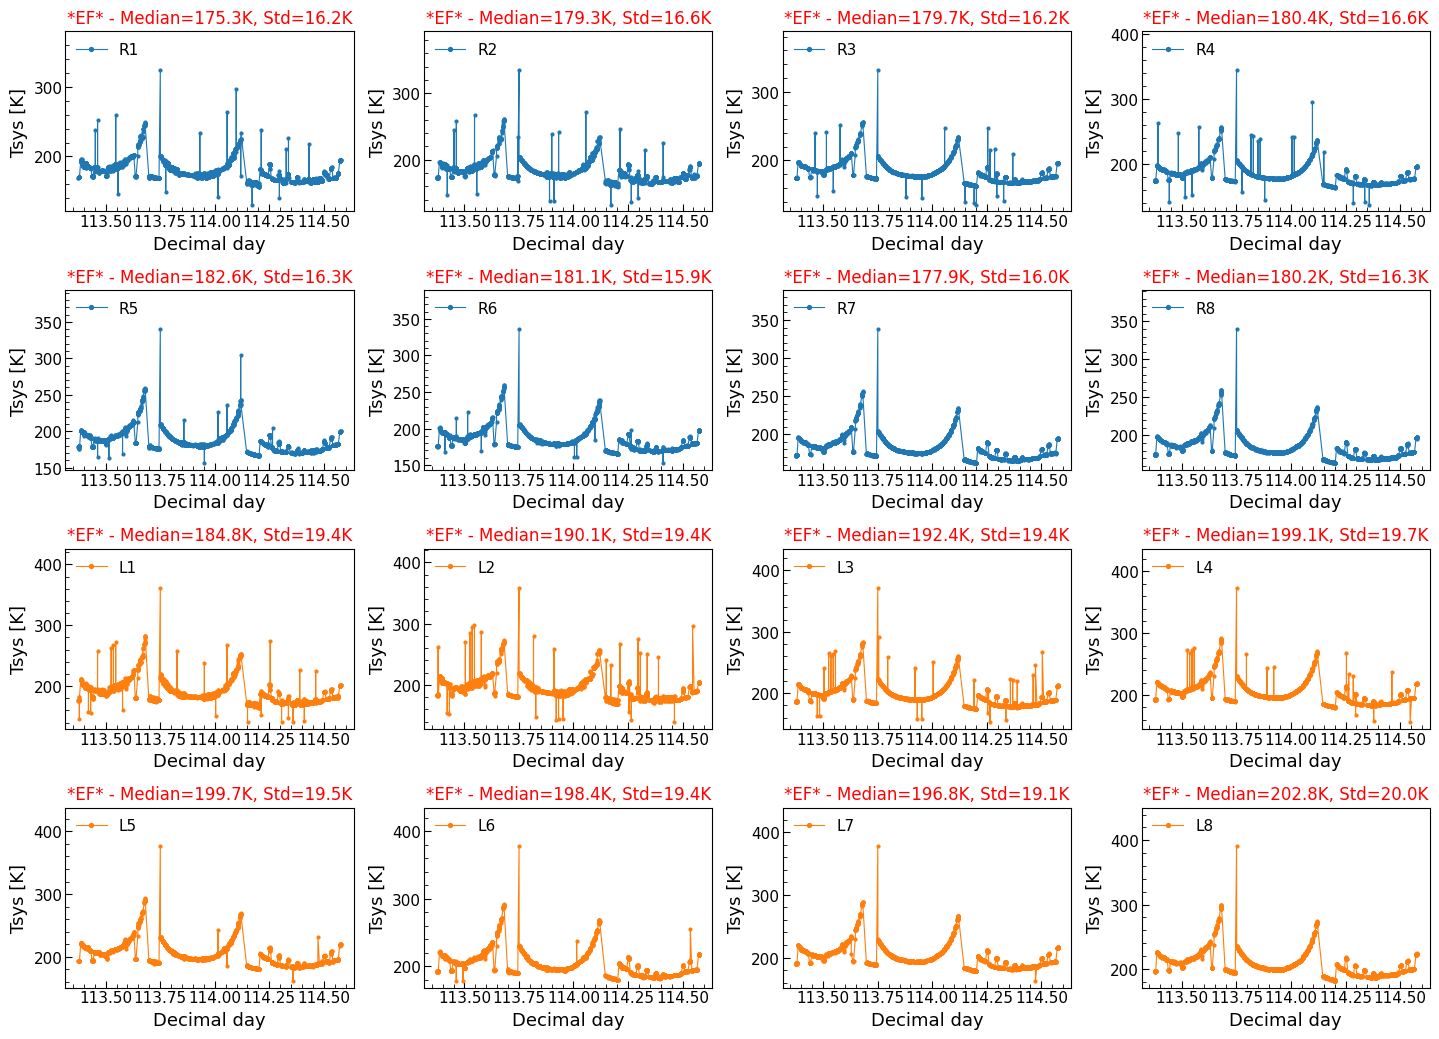

In [39]:
ef.showsys(autosav=True, datout=True)

>!! The raw data already looks good. But, if you want to smooth those single outliers out (i.e., spiking features), ``smthsys`` will do the work (see below).


Apply to all IFs (1) or only selected IFs/times (2)? 
(Give 1 or 2; just Enter --> 1 as default) 
: 1

For ALL IFs, specific time range? (y or n; Enter --> n for the whole time range) 
: y
Give a time range (e.g., 114.4 114.6   --> from 114.4 to 114.6; Decimal day) 
: 113.7 113.8

Interpolation has been performed!!

------------------------------------
R1 Number of Erroneous Tsys --> 1 !
------------------------------------

Interpolation has been performed!!

------------------------------------
R2 Number of Erroneous Tsys --> 1 !
------------------------------------

Interpolation has been performed!!

------------------------------------
R3 Number of Erroneous Tsys --> 1 !
------------------------------------

Interpolation has been performed!!

------------------------------------
R4 Number of Erroneous Tsys --> 1 !
------------------------------------

Interpolation has been performed!!

------------------------------------
R5 Number of Erroneous Tsys --> 1 !
--------------------

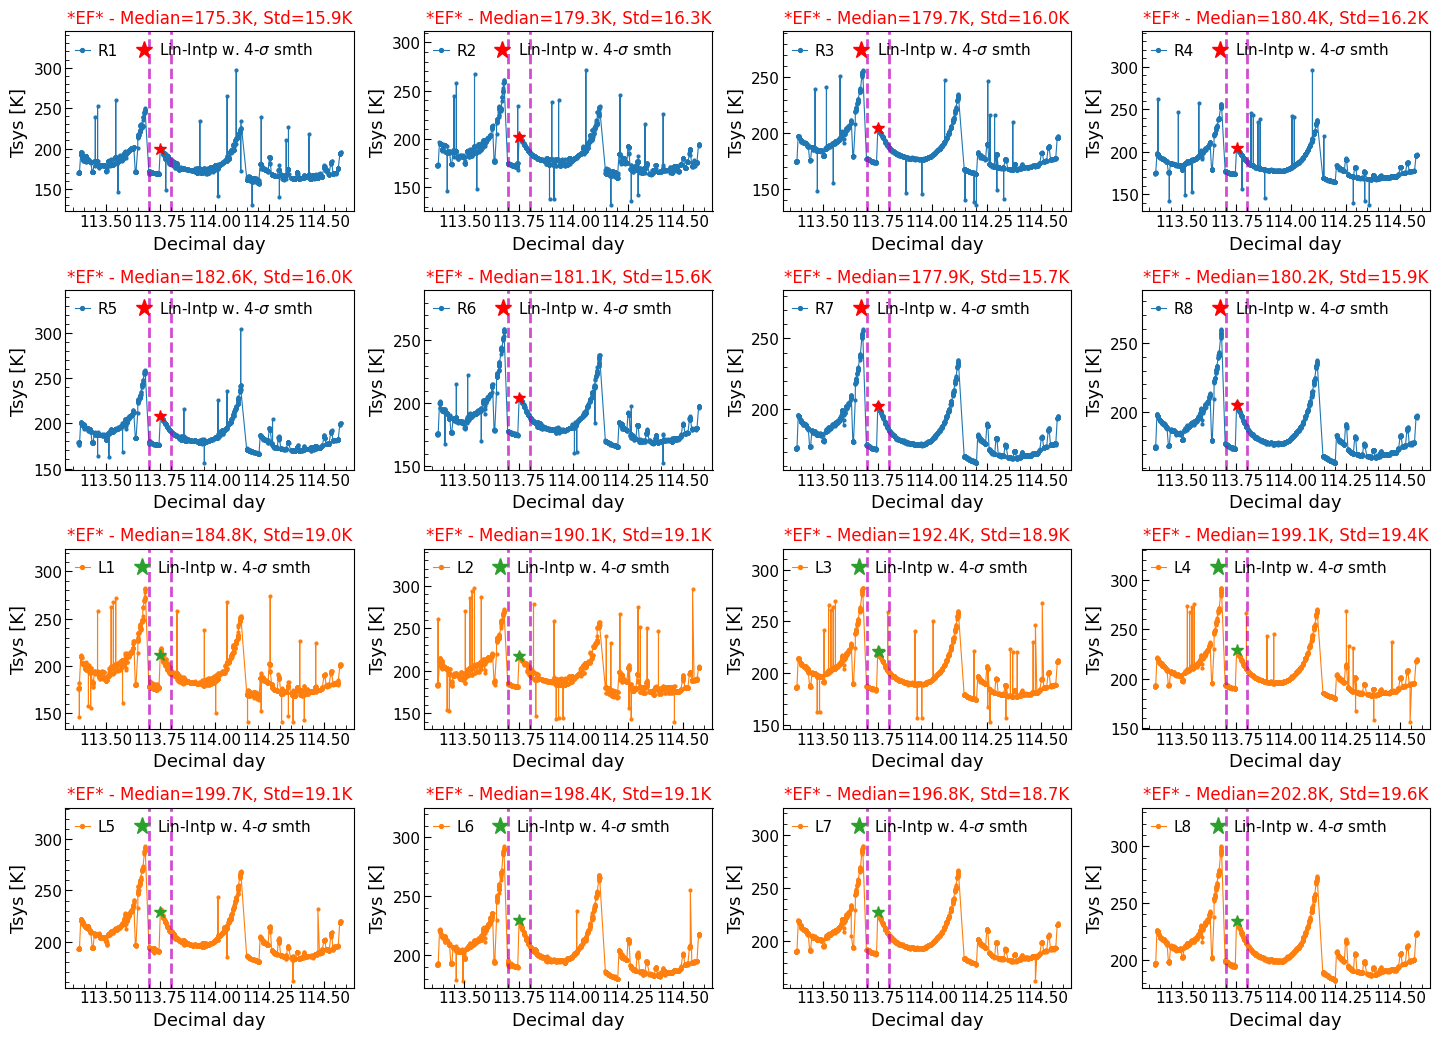


update is set 'True', self.tsys3 has been updated!

autosav is set 'False', thus no output .png file.

datout is set 'False', thus no output .dat file.

**DONE** 
..check self + tsys3 and the output files!       
////////////////////////////////////////////////////////////////////////////////


In [40]:
ef.smthsys(whichdat=1, siglev=4)  
# input data: self.tsys1 (whichdat=1) / output data: self.tsys3 (whichdat=3)

>!! ```showsys``` will show you a plot window of the raw data. With this plot window, you can check the data in more detail and search for specific time ranges which need to be corrected (see [Section 4.2](#Navigate-data-with-the-pyplot-window)). If the outliers are not that extreme, then you can lower the parameter ```siglev```, so that ```smthsys``` can recognize them.  
The data may need to be processed with ```smthsys``` multiple times. This is called **self-update** (see [Section 4.3](#Self-update)). For ```smthsys```, this can be done by keeping the parameters ```whichdat=3```. But then ```update=False``` is recommended for the first test runs. Once you are satisfied with a test result, run it again with ```update=True``` so that the result can be updated.  
Now the result looks good and thus save it by re-running ```smthsys``` as follow: ```ef.smthsys(whichdat=1, siglev=4, autosav=True, datout=True)```. Find '```a_3mm_EF_Tsys3.png```' and '```a_3mm_EF_Tsys3.dat```' in your working directory.

In [42]:
ls

a_3mm_BR_vlbaout.antab  a_7mm_SC_vlbaout.antab  c211agl.antab
a_3mm_EF_Tsys1.dat      a_all_VLBA_raw.dat      c211a-Nn-lcp.asc
a_3mm_EF_Tsys1.png      allinone/               c211a-Nn-rcp.asc
a_3mm_EF_Tsys3.dat      br/                     c212b_gb.an
a_3mm_EF_Tsys3.png      c211acal.vlba           mg006b.Aa.antab
a_7mm_BR_vlbaout.antab  c211aef.antabfs         testing_0_LOG.txt


In [43]:
gmv.sout('EF', 3)


------------------------sorting out...

**DONE** 
The output files has been sorted out!    
////////////////////////////////////////////////////////////////////////////////


In [44]:
ls

a_3mm_BR_vlbaout.antab  allinone/        c211agl.antab     ef/
a_7mm_BR_vlbaout.antab  br/              c211a-Nn-lcp.asc  mg006b.Aa.antab
a_7mm_SC_vlbaout.antab  c211acal.vlba    c211a-Nn-rcp.asc  testing_0_LOG.txt
a_all_VLBA_raw.dat      c211aef.antabfs  c212b_gb.an


>!! **EF** is done now.

## Special case

There are several stations which provide their ANTAB files in quite a different format from those we have seen in previous Sections. Here the special case refers to, for instance, NOEMA (**NN**), GBT (**GB**), GLT (**GL**), and ALMA (**AA**); but note that this can be changed depending on the format of their future ANTAB files. In this Section, we will go through how these stations can be processed with ```AntabGMVA```.

In [45]:
ls

a_3mm_BR_vlbaout.antab  allinone/        c211agl.antab     ef/
a_7mm_BR_vlbaout.antab  br/              c211a-Nn-lcp.asc  mg006b.Aa.antab
a_7mm_SC_vlbaout.antab  c211acal.vlba    c211a-Nn-rcp.asc  testing_0_LOG.txt
a_all_VLBA_raw.dat      c211aef.antabfs  c212b_gb.an


### NOEMA (NN)

For NOEMA (**NN**, also called **Pb**), RCP and LCP data are separated: in this example, '```c211a-Nn-rcp.asc```' --> RCP and '```c211a-Nn-lcp.asc```' --> LCP. Each of them has a single Tsys column that corresponds to 8 IFs (i.e., **'R1:8'** and **'L1:8'**).

In [47]:
nn = gmv.gentab('NN')


###################################
###################################
First, you need to understand observing setting of your data!

***Open up the antab file you want to work on, and answer the questions below***

________________________________________________________________________________      
Antab files separated by RCP and LCP? (e.g., yes/y or no/n; default = no) 
: yes

________________________________________________________________________________      
How many Tsys columns are there?  -->  including all RCP and LCP 
(e.g., 16 or 8 or 4 or 2;  ...  **NOTE** e.g., 'R1:n' or 'R1|L1' --> one column) 
: 2

________________________________________________________________________________      
Select a number below for the Tsys order(IDs)            [***Must-Be-Given***]       

 1 - R1 R2 R3 R4 R5 R6 R7 R8 L1 L2 L3 L4 L5 L6 L7 L8       
 2 - R1:8 L1:8       
 3 - R1:2 L1:2 R3:4 L3:4 R5:6 L5:6 R7:8 L7:8       
 4 - R1 L1 R2 L2 R3 L3 R4 L4       
 5 - R1L1 R2L2 R3L3 R4L4 R5L5

In [48]:
nn.readant()


!!! RCP and LCP are divided into separate Antab files !!!

c211acal.vlba
a_7mm_BR_vlbaout.antab
testing_0_LOG.txt
a_all_VLBA_raw.dat
c211a-Nn-lcp.asc
c211a-Nn-rcp.asc
c211agl.antab
mg006b.Aa.antab
c211aef.antabfs
a_3mm_BR_vlbaout.antab
a_7mm_SC_vlbaout.antab
c212b_gb.an

________________________________________________________________________________         
Give RCP antab file (e.g., c232a_Nn-rcp.asc; ..if None, just Enter) 
: c211a-Nn-rcp.asc

________________________________________________________________________________         
Give LCP antab file (e.g., c232a_Nn-lcp.asc; ..if None, just Enter) 
: c211a-Nn-lcp.asc

________________________________________________________________________________         
Day (DD) column index? (i.e., normally 0 --> 1st column from left) 
: 0

________________________________________________________________________________         
Time (HH:MM) column index? (i.e., normally 1 --> 2nd column from left) 
: 1

_______________________________________

In [49]:
nn.overview()


***********************************RESULTS***********************************

--> R1:8 seems Fine. (BUT at least check the plot with 'showsys')

--> L1:8 seems Fine. (BUT at least check the plot with 'showsys')

**DONE** 
..check self + inich (for each IF, 0: Fine / 1: Unreasonable found)       
////////////////////////////////////////////////////////////////////////////////




... a_3mm_NN_Tsys1.png ! 



... a_3mm_NN_Tsys1.dat ! 


**DONE** 
..check self + tarr and the output files!       
////////////////////////////////////////////////////////////////////////////////


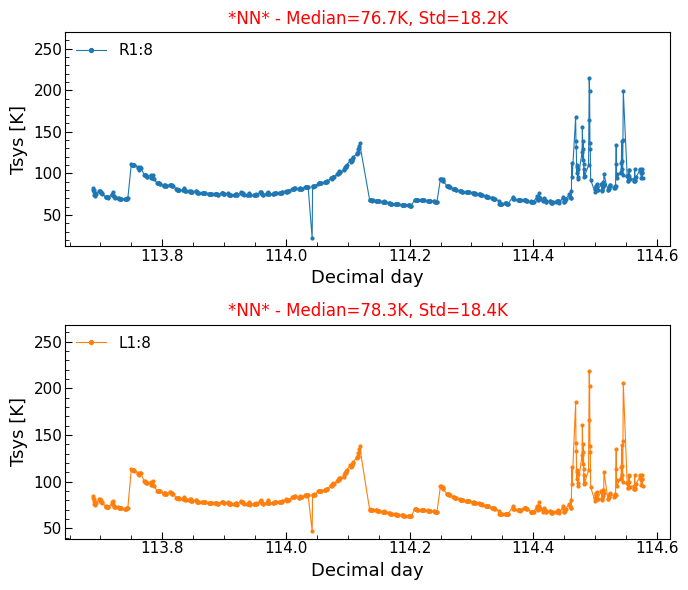

In [50]:
nn.showsys(autosav=True, datout=True)

>!! Overall, everything looks fine for both RCP and LCP, and you can just use the output raw data here (i.e., '```a_3mm_NN_Tsys1.dat```'). However, you may want to smooth out the single obvious outlier at around Day ~114.05 by using ```smthsys```.

In [51]:
ls

a_3mm_BR_vlbaout.antab  a_all_VLBA_raw.dat  c211agl.antab     mg006b.Aa.antab
a_3mm_NN_Tsys1.dat      allinone/           c211a-Nn-lcp.asc  testing_0_LOG.txt
a_3mm_NN_Tsys1.png      br/                 c211a-Nn-rcp.asc
a_7mm_BR_vlbaout.antab  c211acal.vlba       c212b_gb.an
a_7mm_SC_vlbaout.antab  c211aef.antabfs     ef/


In [52]:
gmv.sout('NN', 1)


------------------------sorting out...

**DONE** 
The output files has been sorted out!    
////////////////////////////////////////////////////////////////////////////////


In [53]:
ls

a_3mm_BR_vlbaout.antab  allinone/        c211agl.antab     ef/
a_7mm_BR_vlbaout.antab  br/              c211a-Nn-lcp.asc  mg006b.Aa.antab
a_7mm_SC_vlbaout.antab  c211acal.vlba    c211a-Nn-rcp.asc  nn/
a_all_VLBA_raw.dat      c211aef.antabfs  c212b_gb.an       testing_0_LOG.txt


### GBT (GB)

The GBT participated in the GMVA 21B session (October 2021) with 4 IFs of a single polarization (i.e., RCP) only. In particular, one of the IFs is just full of zeros. In this case, you could use a neighboring good IF with ```cpifsys``` (of course, if the IF actually has some good data and the zeros are just erroneous).

In [54]:
gb = gmv.gentab('GB')


###################################
###################################
First, you need to understand observing setting of your data!

***Open up the antab file you want to work on, and answer the questions below***

________________________________________________________________________________      
Antab files separated by RCP and LCP? (e.g., yes/y or no/n; default = no) 
: y

________________________________________________________________________________      
How many Tsys columns are there?  -->  including all RCP and LCP 
(e.g., 16 or 8 or 4 or 2;  ...  **NOTE** e.g., 'R1:n' or 'R1|L1' --> one column) 
: 4

________________________________________________________________________________      
Select a number below for the Tsys order(IDs)            [***Must-Be-Given***]       

 1 - R1 R2 R3 R4 R5 R6 R7 R8 L1 L2 L3 L4 L5 L6 L7 L8       
 2 - R1:8 L1:8       
 3 - R1:2 L1:2 R3:4 L3:4 R5:6 L5:6 R7:8 L7:8       
 4 - R1 L1 R2 L2 R3 L3 R4 L4       
 5 - R1L1 R2L2 R3L3 R4L4 R5L5 R

>!! At the first question "_Antab files separated by RCP and LCP?_", **both 'y' and 'n' works in this case** (i.e., single polarization).

In [55]:
gb.readant()


!!! RCP and LCP are divided into separate Antab files !!!

c211acal.vlba
a_7mm_BR_vlbaout.antab
testing_0_LOG.txt
a_all_VLBA_raw.dat
c211a-Nn-lcp.asc
c211a-Nn-rcp.asc
c211agl.antab
mg006b.Aa.antab
c211aef.antabfs
a_3mm_BR_vlbaout.antab
a_7mm_SC_vlbaout.antab
c212b_gb.an

________________________________________________________________________________         
Give RCP antab file (e.g., c232a_Nn-rcp.asc; ..if None, just Enter) 
: c212b_gb.an

________________________________________________________________________________         
Give LCP antab file (e.g., c232a_Nn-lcp.asc; ..if None, just Enter) 
: 

________________________________________________________________________________         
Day (DD) column index? (i.e., normally 0 --> 1st column from left) 
: 0

________________________________________________________________________________         
Time (HH:MM) column index? (i.e., normally 1 --> 2nd column from left) 
: 1

____________________________________________________________

In [56]:
gb.overview()

-> 0 found!!
-> 0 found!!

***********************************RESULTS***********************************

--> R1 with something Wrong! (check further with 'showsys')

--> R2 with something Wrong! (check further with 'showsys')

--> R3 seems Fine. (BUT at least check the plot with 'showsys')

--> R4 seems Fine. (BUT at least check the plot with 'showsys')

**DONE** 
..check self + inich (for each IF, 0: Fine / 1: Unreasonable found)       
////////////////////////////////////////////////////////////////////////////////




... b_3mm_GB_Tsys1.png ! 



... b_3mm_GB_Tsys1.dat ! 


**DONE** 
..check self + tarr and the output files!       
////////////////////////////////////////////////////////////////////////////////


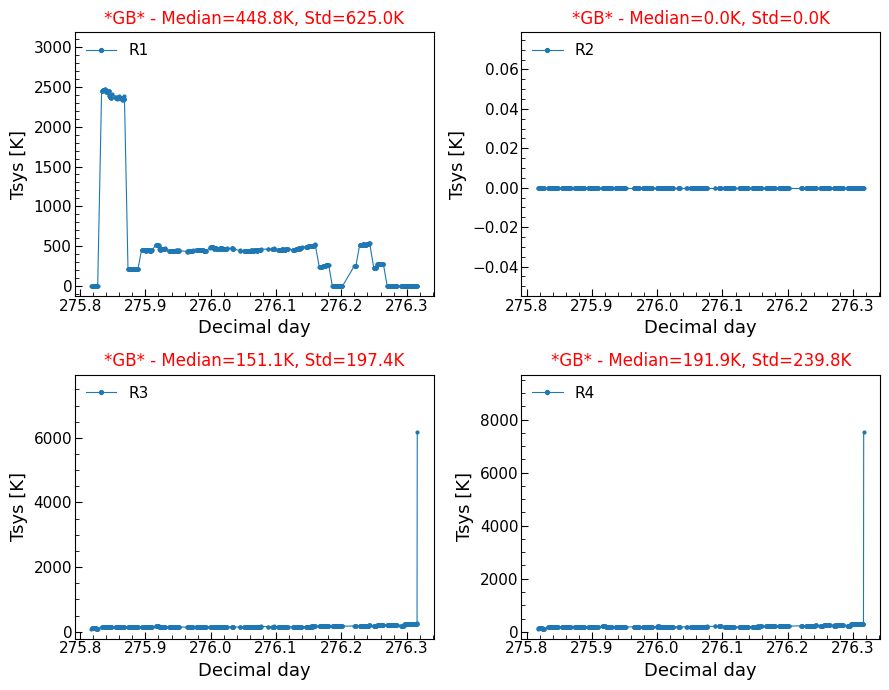

In [57]:
gb.showsys(autosav=True, datout=True)

>!! As mentioned earlier, the 2nd IF is completely zero. Now, we will copy the 3rd IF which looks good, and paste it to the 2nd IF.


Among --> R1 R2 R3 R4

ID of an IF to be *COPIED*? (e.g., R1 or R1:2; see output figures) 
:R3

ID of an IF to be *PASTED*? (e.g., L1 or L1:2; see output figures) 
:R2

------------------------------------
R2 Single IF has been copied/pasted !
------------------------------------


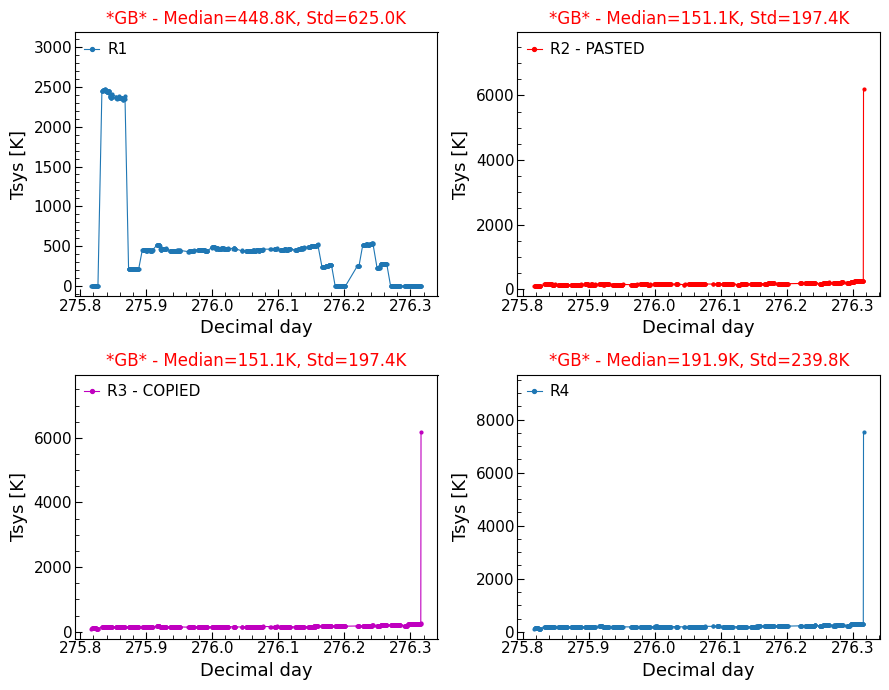


update is set 'True', self.tsys4 has been updated!


... b_3mm_GB_Tsys4.png ! 



... b_3mm_GB_Tsys4.dat ! 


More IFs to be C&P?, run 'cpifsys' again with 'whichdat=4' & 'update=True'.

**DONE** 
..check self + tsys4, cpfrom, cpto and the output files!       
////////////////////////////////////////////////////////////////////////////////


<Figure size 640x480 with 0 Axes>

In [58]:
gb.cpifsys(whichdat=1, autosav=True, datout=True)  
# input data: self.tsys1 (whichdat=1) / output data: self.tsys4 (whichdat=4)

>!! Looks good. Now, let's check the data in detail with ``intpsys``.


******************************************************************************** 
********************************************************************************      
...Erroneous can be... 
 -->  0 
 -->  Negative 
 -->  999.0 
 -->  >[User input] 
 -->  (optional) Between A and B       

(Press Enter and move on!) 


*Tsys column *R1* Cut-out above THIS threshold!* 
Give input or just Enter (default: 9999) 
: 

*Tsys column *R1* Cut-out Between A and B?* 
(yes/y or no/n/Enter; default = no) 
: 

Interpolation has been performed!!

------------------------------------
R1 Number of Erroneous Tsys --> 186 !
------------------------------------

*Tsys column *R2* Cut-out above THIS threshold!* 
Give input or just Enter (default: 9999) 
: 5000

*Tsys column *R2* Cut-out Between A and B?* 
(yes/y or no/n/Enter; default = no) 
: 

Interpolation has been performed!!

------------------------------------
R2 Number of Erroneous Tsys --> 1 !
------------------------------------

*Tsys column

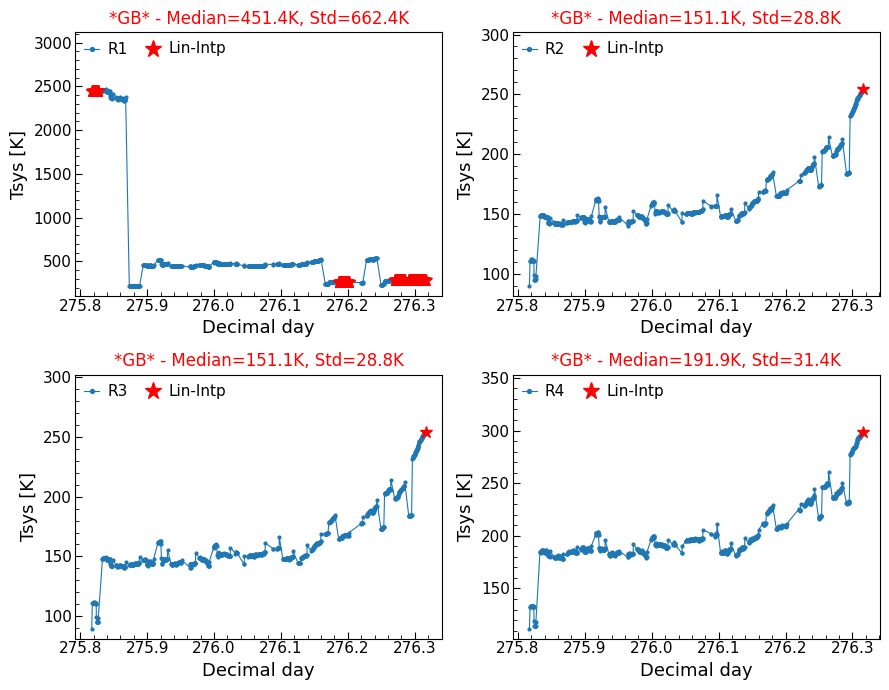


update is set 'True', self.tsys2 has been updated!

autosav is set 'False', thus no output .png file.

datout is set 'False', thus no output .dat file.

**DONE** 
..check self + tsys2 and the output files!       
////////////////////////////////////////////////////////////////////////////////


In [62]:
gb.intpsys(whichdat=4)  
# input data: self.tsys4 (whichdat=4) / output data: self.tsys2 (whichdat=2)

>!! **The four default criteria of ```intpsys``` are not enough in this case** due to the one outlier below 9999K in R2, R3, and R4. Thus, manual input (i.e., **the fine tuning**) was given to each IF as shown above. Some of the zero values in R1 were also replaced by the interpolation. If you are satisfied with this result, then run it again with the two parameters: ``autosav=True`` and ``datout=True``. This returns '```b_3mm_GB_Tsys2.png```' and '```b_3mm_GB_Tsys2.dat```'.

In [64]:
ls

a_3mm_BR_vlbaout.antab  b_3mm_GB_Tsys1.png  c211acal.vlba     ef/
a_7mm_BR_vlbaout.antab  b_3mm_GB_Tsys2.dat  c211aef.antabfs   mg006b.Aa.antab
a_7mm_SC_vlbaout.antab  b_3mm_GB_Tsys2.png  c211agl.antab     nn/
a_all_VLBA_raw.dat      b_3mm_GB_Tsys4.dat  c211a-Nn-lcp.asc  testing_0_LOG.txt
allinone/               b_3mm_GB_Tsys4.png  c211a-Nn-rcp.asc
b_3mm_GB_Tsys1.dat      br/                 c212b_gb.an


In [65]:
gmv.sout('GB', 2)


------------------------sorting out...

**DONE** 
The output files has been sorted out!    
////////////////////////////////////////////////////////////////////////////////


In [66]:
ls

a_3mm_BR_vlbaout.antab  br/               c211a-Nn-rcp.asc  nn/
a_7mm_BR_vlbaout.antab  c211acal.vlba     c212b_gb.an       testing_0_LOG.txt
a_7mm_SC_vlbaout.antab  c211aef.antabfs   ef/
a_all_VLBA_raw.dat      c211agl.antab     gb/
allinone/               c211a-Nn-lcp.asc  mg006b.Aa.antab


### GLT (GL)

The GLT (**GL**) provides ANTAB file in an Excel format. Thus, one needs to convert it to the plain text file first. This can be done by:  

(1) open the Excel file  
(2) save as a CSV file  
(3) run the following $\texttt{awk}$ command in terminal (not Python).  

``awk 'BEGIN {FS=";" ;OFS="  "} {print $2,$3,$7}' "csv file name" > "output text file name"``

Then, the output from this command is ready to be processed with $\texttt{AntabGMVA}$.

In [67]:
gl = gmv.gentab('GL')


###################################
###################################
First, you need to understand observing setting of your data!

***Open up the antab file you want to work on, and answer the questions below***

________________________________________________________________________________      
Antab files separated by RCP and LCP? (e.g., yes/y or no/n; default = no) 
: 

________________________________________________________________________________      
How many Tsys columns are there?  -->  including all RCP and LCP 
(e.g., 16 or 8 or 4 or 2;  ...  **NOTE** e.g., 'R1:n' or 'R1|L1' --> one column) 
: 2

________________________________________________________________________________      
Select a number below for the Tsys order(IDs)            [***Must-Be-Given***]       

 1 - R1 R2 R3 R4 R5 R6 R7 R8 L1 L2 L3 L4 L5 L6 L7 L8       
 2 - R1:8 L1:8       
 3 - R1:2 L1:2 R3:4 L3:4 R5:6 L5:6 R7:8 L7:8       
 4 - R1 L1 R2 L2 R3 L3 R4 L4       
 5 - R1L1 R2L2 R3L3 R4L4 R5L5 R6

In [68]:
gl.readant()

c211acal.vlba
a_7mm_BR_vlbaout.antab
testing_0_LOG.txt
a_all_VLBA_raw.dat
c211a-Nn-lcp.asc
c211a-Nn-rcp.asc
c211agl.antab
mg006b.Aa.antab
c211aef.antabfs
a_3mm_BR_vlbaout.antab
a_7mm_SC_vlbaout.antab
c212b_gb.an

Give antab file (e.g., c232aef.antabfs or a_3mm_BR_vlbaout.antab) 
: c211agl.antab

!!! There is something wrong with this data; this can happen with **GLT**                
    (either several time bins with no Tsys data --and/or-- single Tsys column)

--> Please check the Antab file and answer the following question. 
(Press Enter to move on)


Assuming RCL/LCP columns are tied into a single column with a delimeter,,, 
--> What is the delimeter here? (e.g., / or , or any symbol) 
: /

(1) The single column with dual data will be divided into two columns! 
    (..later set 'R' & 'L' in INDEX properly) 

(2) Any empty bins will be filled with '0' values! 

**DONE** 
..check self + tsys1       
////////////////////////////////////////////////////////////////////////////////


>!! This is one of the most complicated ANTAB formats. Both RCP and LCP columns are tied into a single column with a certain delimeter which is '``/``' in this GMVA session. Plus, there are some empty time bins without any Tsys value. But, $\texttt{AntabGMVA}$ can also handle such a case.


In [69]:
gl.overview()

-> 0 found!!
-> 0 found!!

***********************************RESULTS***********************************

--> R1:8 with something Wrong! (check further with 'showsys')

--> L1:8 with something Wrong! (check further with 'showsys')

**DONE** 
..check self + inich (for each IF, 0: Fine / 1: Unreasonable found)       
////////////////////////////////////////////////////////////////////////////////




... a_3mm_GL_Tsys1.png ! 



... a_3mm_GL_Tsys1.dat ! 


**DONE** 
..check self + tarr and the output files!       
////////////////////////////////////////////////////////////////////////////////


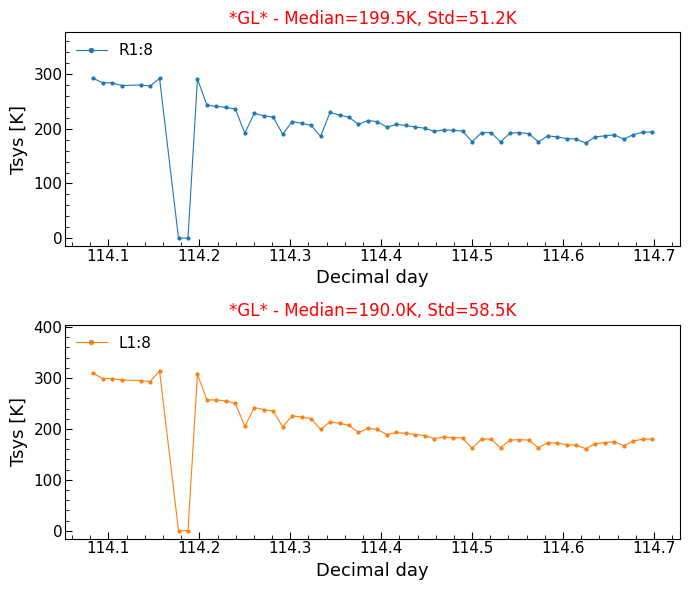

In [70]:
gl.showsys(autosav=True, datout=True)

>!! Here the zero values correspond to the empty time bins mentioned above. They can be simply processed with either ``intpsys`` or ``smthsys``. To show more various ways for the correction, the latter was used (see below).


Apply to all IFs (1) or only selected IFs/times (2)? 
(Give 1 or 2; just Enter --> 1 as default) 
: 2

Among IFs below...
  1 - R1:8
  2 - L1:8

Select IFs to be smoothed (e.g., 2 3 5 --> Index numbers printed above) 
: 1 2

..IF-selection is applied..

For R1:8, specific time range? (y or n; Enter --> n) 
: y
Give a time range (e.g., 114.4 114.6  --> from 114.4 to 114.6; Decimal day) 
: 100 114.3

Interpolation has been performed!!

------------------------------------
R1:8 Number of Erroneous Tsys --> 2 !
------------------------------------

..IF-selection is applied..

For L1:8, specific time range? (y or n; Enter --> n) 
: n

Consider full time range!

Interpolation has been performed!!

------------------------------------
L1:8 Number of Erroneous Tsys --> 2 !
------------------------------------


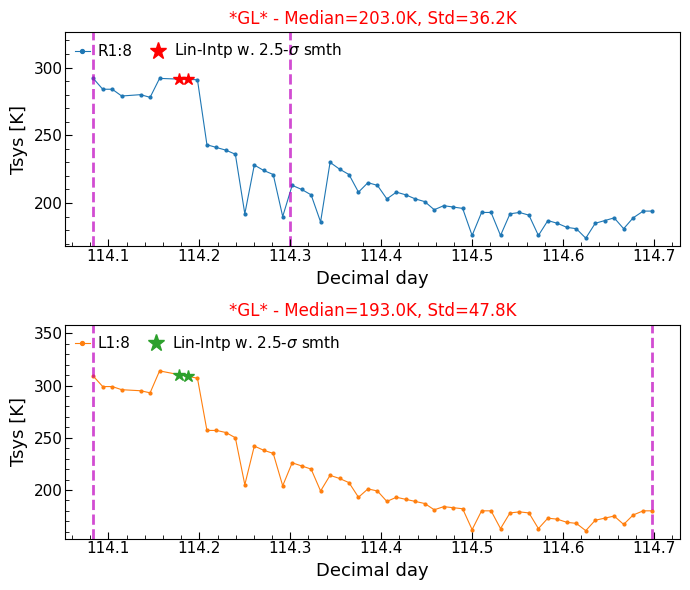


update is set 'True', self.tsys3 has been updated!

autosav is set 'False', thus no output .png file.

datout is set 'False', thus no output .dat file.

**DONE** 
..check self + tsys3 and the output files!       
////////////////////////////////////////////////////////////////////////////////


In [71]:
gl.smthsys(whichdat=1, siglev=2.5)  
# input data: self.tsys1 (whichdat=1) / output data: self.tsys3 (whichdat=3)

>!! If there is no change, try to lower the parameter ``siglev`` with a narrower time range. The result looks good and now run it again with the two parameters: ``autosav=True`` and ``datout=True``. This returns '```a_3mm_GL_Tsys3.png```' and '```a_3mm_GL_Tsys3.dat```'.

In [73]:
ls

a_3mm_BR_vlbaout.antab  a_all_VLBA_raw.dat  c211a-Nn-rcp.asc
a_3mm_GL_Tsys1.dat      allinone/           c212b_gb.an
a_3mm_GL_Tsys1.png      br/                 ef/
a_3mm_GL_Tsys3.dat      c211acal.vlba       gb/
a_3mm_GL_Tsys3.png      c211aef.antabfs     mg006b.Aa.antab
a_7mm_BR_vlbaout.antab  c211agl.antab       nn/
a_7mm_SC_vlbaout.antab  c211a-Nn-lcp.asc    testing_0_LOG.txt


In [74]:
gmv.sout('GL', 3)


------------------------sorting out...

**DONE** 
The output files has been sorted out!    
////////////////////////////////////////////////////////////////////////////////


In [75]:
ls

a_3mm_BR_vlbaout.antab  br/               c211a-Nn-rcp.asc  mg006b.Aa.antab
a_7mm_BR_vlbaout.antab  c211acal.vlba     c212b_gb.an       nn/
a_7mm_SC_vlbaout.antab  c211aef.antabfs   ef/               testing_0_LOG.txt
a_all_VLBA_raw.dat      c211agl.antab     gb/
allinone/               c211a-Nn-lcp.asc  gl/


### ALMA (AA)

The overall structure of ALMA ANTAB files is actually simple and general. But, it has a special form in the INDEX parameter. Each Tsys column is for both RCP and LCP (i.e., `'Lx|Rx'`).

In [76]:
aa = gmv.gentab('AA')


###################################
###################################
First, you need to understand observing setting of your data!

***Open up the antab file you want to work on, and answer the questions below***

________________________________________________________________________________      
Antab files separated by RCP and LCP? (e.g., yes/y or no/n; default = no) 
: 

________________________________________________________________________________      
How many Tsys columns are there?  -->  including all RCP and LCP 
(e.g., 16 or 8 or 4 or 2;  ...  **NOTE** e.g., 'R1:n' or 'R1|L1' --> one column) 
: 8

________________________________________________________________________________      
Select a number below for the Tsys order(IDs)            [***Must-Be-Given***]       

 1 - R1 R2 R3 R4 R5 R6 R7 R8 L1 L2 L3 L4 L5 L6 L7 L8       
 2 - R1:8 L1:8       
 3 - R1:2 L1:2 R3:4 L3:4 R5:6 L5:6 R7:8 L7:8       
 4 - R1 L1 R2 L2 R3 L3 R4 L4       
 5 - R1L1 R2L2 R3L3 R4L4 R5L5 R6

In [77]:
aa.readant()

c211acal.vlba
a_7mm_BR_vlbaout.antab
testing_0_LOG.txt
a_all_VLBA_raw.dat
c211a-Nn-lcp.asc
c211a-Nn-rcp.asc
c211agl.antab
mg006b.Aa.antab
c211aef.antabfs
a_3mm_BR_vlbaout.antab
a_7mm_SC_vlbaout.antab
c212b_gb.an

Give antab file (e.g., c232aef.antabfs or a_3mm_BR_vlbaout.antab) 
: mg006b.Aa.antab

**DONE** 
..check self + tsys1       
////////////////////////////////////////////////////////////////////////////////


In [78]:
aa.overview()


***********************************RESULTS***********************************

--> R1L1 seems Fine. (BUT at least check the plot with 'showsys')

--> R2L2 seems Fine. (BUT at least check the plot with 'showsys')

--> R3L3 seems Fine. (BUT at least check the plot with 'showsys')

--> R4L4 seems Fine. (BUT at least check the plot with 'showsys')

--> R5L5 seems Fine. (BUT at least check the plot with 'showsys')

--> R6L6 seems Fine. (BUT at least check the plot with 'showsys')

--> R7L7 seems Fine. (BUT at least check the plot with 'showsys')

--> R8L8 seems Fine. (BUT at least check the plot with 'showsys')

**DONE** 
..check self + inich (for each IF, 0: Fine / 1: Unreasonable found)       
////////////////////////////////////////////////////////////////////////////////




... b_3mm_AA_Tsys1.png ! 



... b_3mm_AA_Tsys1.dat ! 


**DONE** 
..check self + tarr and the output files!       
////////////////////////////////////////////////////////////////////////////////


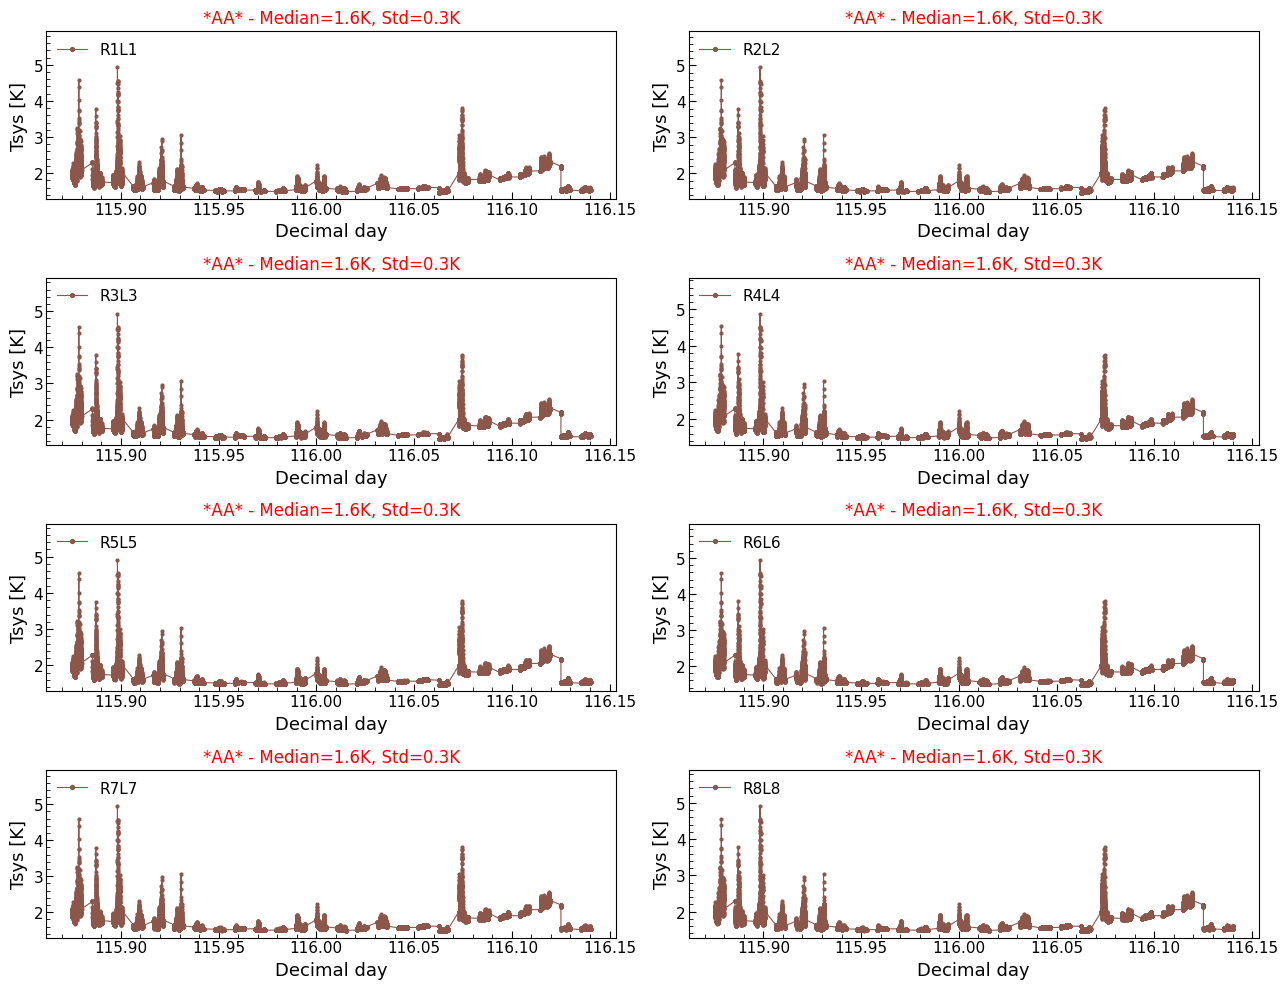

In [79]:
aa.showsys(autosav=True, datout=True)

>!! ALMA Tsys values are extremely low. This is because they divide the single-antenna Tsys by the number of phased antennas. It is worth noting that the ALMA sensitivity is unparalleled. All IFs seem fine and no further corrections required. Use the output .dat file (i.e., '```b_3mm_AA_Tsys1.dat```') for the data calibration.

In [80]:
ls

a_3mm_BR_vlbaout.antab  b_3mm_AA_Tsys1.dat  c211agl.antab     gb/
a_7mm_BR_vlbaout.antab  b_3mm_AA_Tsys1.png  c211a-Nn-lcp.asc  gl/
a_7mm_SC_vlbaout.antab  br/                 c211a-Nn-rcp.asc  mg006b.Aa.antab
a_all_VLBA_raw.dat      c211acal.vlba       c212b_gb.an       nn/
allinone/               c211aef.antabfs     ef/               testing_0_LOG.txt


In [81]:
gmv.sout('AA', 1)


------------------------sorting out...

**DONE** 
The output files has been sorted out!    
////////////////////////////////////////////////////////////////////////////////


In [82]:
ls

a_3mm_BR_vlbaout.antab  allinone/        c211a-Nn-lcp.asc  gl/
a_7mm_BR_vlbaout.antab  br/              c211a-Nn-rcp.asc  mg006b.Aa.antab
a_7mm_SC_vlbaout.antab  c211acal.vlba    c212b_gb.an       nn/
aa/                     c211aef.antabfs  ef/               testing_0_LOG.txt
a_all_VLBA_raw.dat      c211agl.antab    gb/


## Final steps

### Merging ANTABs

Now, the final products in the '```allinone```' folder can be used in the data calibration. But, there is a convenient way to manage all of them. The function ```allinone``` will allow you to merged all those final products into the All-in-One ANTAB file. Then, you can just use this single file for further processes in **AIPS** or **CASA (rPICARD)**.

In [83]:
cd allinone

/homes/dwkim/Desktop/AntabGMVA/JupyterNote/Examples/ANTAB/allinone


In [84]:
pwd

'/homes/dwkim/Desktop/AntabGMVA/JupyterNote/Examples/ANTAB/allinone'

In [85]:
ls

a_3mm_BR_Tsys2.dat  a_3mm_GL_Tsys3.dat  b_3mm_AA_Tsys1.dat
a_3mm_EF_Tsys3.dat  a_3mm_NN_Tsys1.dat  b_3mm_GB_Tsys2.dat


>!! We have here six final ANTAB files in total. **In this 'allinone' folder, there should only be the "FINAL" products.**

In [87]:
gmv.allinone()


!! - In the 'allinone' folder with only the Final Products - !!

Give a prefix of the output filename (e.g., 'c211ab', 'c222abcd', 'c221abc') 
: c21xtest

Array name + Observing wavelength (e.g., 'GMVA3mm') 
: GMVA3mm
 
a_3mm_BR_Tsys2.dat
a_3mm_NN_Tsys1.dat
a_3mm_GL_Tsys3.dat
a_3mm_EF_Tsys3.dat
b_3mm_GB_Tsys2.dat
b_3mm_AA_Tsys1.dat
-----------------------------------------------------   
-> Merge all the above data into one single text file


... ALLINONE_c21xtest_GMVA3mm.antab ! 


**DONE** 
..check an output file    
////////////////////////////////////////////////////////////////////////////////


In [88]:
ls ALL*

ALLINONE_c21xtest_GMVA3mm.antab


>!! **That's it!** Load this combined ANTAB file into AIPS or CASA (rPICARD), and begin the further calibrations. Note that sometimes the FREQ parameter in the GAIN line could cause an error with AIPS. In that case, just remove the FREQ parameter from the GAIN line of the station where the AIPS error message points.

**If your data spans multiple sessions** and you want to merge multiple ANTAB files of a station into one, there is a function ```linkses``` which will do the work (see below).

In [94]:
pwd

'/homes/dwkim/Desktop/AntabGMVA/JupyterNote/Examples/ANTAB/linkses'

>!! Just created an empty folder '```linkses```' and put some fake data in it.

In [95]:
ls

a_3mm_GL_Tsys1.dat  b_3mm_GL_Tsys1.dat  c_3mm_GL_Tsys1.dat


In [97]:
gmv.linkses()

a_3mm_GL_Tsys1.dat
c_3mm_GL_Tsys1.dat
b_3mm_GL_Tsys1.dat

Give multi-session files of ONE ANTENNA in time order --> alphabetic!)    
(e.g., c211aef.antabfs c211bef.antabfs c211cef.antabfs) 
: a_3mm_GL_Tsys1.dat b_3mm_GL_Tsys1.dat c_3mm_GL_Tsys1.dat

Give Session codes (e.g., abc, if a/b/c sessions are used) 
: abc

Give Antenna code (e.g., EF, if it is the Effelsberg station) 
: GL

Observing frequency? (e.g., 3mm) 
: 3mm


... abc_3mm_GL_link.dat ! 


**DONE** 
..check an output file    
////////////////////////////////////////////////////////////////////////////////


In [98]:
ls

a_3mm_GL_Tsys1.dat  abc_3mm_GL_link.dat  b_3mm_GL_Tsys1.dat  c_3mm_GL_Tsys1.dat


>!! Find the result (i.e., '```abc_3mm_GL_link.dat```').

### ANTAB cross-checking

Before you merge any of the processed ANTAB files, you may want to double check the results to be sure if everything is fine. Then, use ```doublecheck```. This will show you the Tsys plot of an input data without saving as the .png file.

In [100]:
help(gmv.doublecheck)
# Find all the details about this function.

Help on function doublecheck in module antabgmva.antabgmva:

doublecheck(inputdat=None, fonttit=12, fontaxlab=13, fontleg=11, fontticklab=11)
    Create a plot of input Tsys data. Here the input data can be either
    data in processing (i.e., [self.tsys#,self.colids]) or an external file.
    Here the external file should be the ones generated by this program
    and not raw antab files. This function is basically for double-checking
    the processed datasets to be sure if everything is fine and as expected.

    <Params>
     inputdat    : Input Tsys data (internal or external; see examples below).
     fonttit     : Fontsize of Figure Title
     fontaxlab   : Fontsize of Figure Axis labels
     fontleg     : Fontsize of Figure Legend
     fontticklab : Fontsize of Figure Axis-tick labels

    e.g., internal (self.tsys#)     : doublecheck([self.tsys#, self.colids])
    e.g., external ('~~_Tsys#.dat') : doublecheck()

    output: A plot window will show up (no output data).



# Useful notes

## Some skippable inputs

The two classes (i.e., ```gentab``` and ```vlbaout```) will ask the following four questions: INDEX - TSYS - GAIN - POLY. As mentioned above, you can actually skip these parts just by pressing the 'Enter' key. You will also be informed of this in the questions by one of the following statements.

In [ ]:
"To skip, press Enter"

"skip and do it later? then just Enter"

"Skip for now --> press Enter"

**This is just depending on your preference.** If you want to check the data condition first and then give the inputs later separately by either **re-defining the ```self.parameters```** (i.e., '```HDa```' and '```HDb```') or **editing the output .dat files** directly via any editor (e.g., _gedit_ or _vi_), just skip those parts. But, if you already have all the information (i.e., the GAIN/TSYS lines) of your ANTAB files, then you don't have to skip them.

## Navigate data with the pyplot window

Python employs a plotting window in an interactive mode. For example, if you run ```showsys```, the plot window will appear and show the Tsys curves in it. In this plot window, you can navigate the displayed Tsys data in more detail to find the exact time ranges and/or the Tsys levels to be cut. There is an icon with a magnifier symbol at the top or bottom of the window (for the matplotlib backend: ```Qt5Agg```, it is located at the top). This option allows you to **"Zoom to rectangle"**.

## Self-update

You may need to use a single correction function multiple times (e.g., ```intpsys``` or ```smthsys```). This is called **'self-update'** in this program. The class ```gentab``` has **four data arrays** for collecting Tsys data as follow.

***self.tsys1*** = Raw data saved by ```readant```  
***self.tsys2*** = Linear interpolated data saved by ```intpsys```  
***self.tsys3*** = Smoothed data saved by ```smthsys```  
***self.tsys4*** = Copy-and-pasted data saved by ```cpifsys```  

When you do the self-updating, it is highly likely that you need several test runs of it (until you find the result satisfactory). In that case, you need to set an additional parameter ```update=False``` in the functions. Once you are satisfied with a test result, then now you run it again with ```update=True``` (or just without this parameter: default is ```True```). An example of the procedure can be found below.

In [ ]:
# ========== self-updating with smthsys ==========

# [1] A first smthsys result will be saved in self.tsys3
xx.smthsys(whichdat=3, siglev=5, autosav=True, datout=True)

# [2] Now, do the self-updating for further fine corrections
#    For test runs, set update = False and autosav & datout = False (default)
#     * autosav=False (default): no output figure
#     * datout=False (default): no output data file
#     * update=False: do not update self.tsys# (.tsys3 for smthsys)
xx.smthsys(whichdat=3, siglev=4, update=False)
...
...
xx.smthsys(whichdat=3, siglev=2.5, update=False)

# [3] Once you are satisfied with the result, then re-run with update=True (default)
xx.smthsys(whichdat=3, siglev=2.5, autosav=True, datout=True)

# [4] Repeat the steps [2] --> [3] (Updating), until you are fully satisfied.

# Weather (WX) data

WX data are provided separately from ANTAB files. This program has a function ```wxgen``` for the WX data (see below). But, this function is only for merging all WX files into one single WX file like the All-in-One ANTAB file introduced above.

In [102]:
help(gmv.wxgen)

Help on function wxgen in module antabgmva.antabgmva:

wxgen(skipvlba=False)
    To generate a single 'All-in-One' WX data file.
    This new function is the same as 'allinone', but for WX datasets.

    <Param>
     skipvlba : True, if you do not have VLBA data (e.g., c222acal.vlba).
                Default: False (means you have VLBA in your data).

    e.g., wxgen() or wxgen(skipvlba=True)

    output: Single WX file in the working directory.



In [122]:
pwd

'/homes/dwkim/Desktop/AntabGMVA/JupyterNote/Examples/WX'

In [126]:
ls

c222bcal.vlba   WX.c222bkt.log  WX.c222bky.log  WX.c222bon.log  WX.c222bys.log
WX.c222bef.log  WX.c222bku.log  WX.c222bmh.log  WX.c222bpv.log


In [131]:
gmv.wxgen()

WX.c222bkt.log
c222bcal.vlba
WX.c222bon.log
WX.c222bku.log
WX.c222bpv.log
WX.c222bys.log
WX.c222bmh.log
WX.c222bky.log
WX.c222bef.log

********************** 
Lets begin with VLBA.. 
**********************

Give VLBA wx-files (e.g., c222acal.vlba) 
: c222bcal.vlba
   
1 * ----- Weather information for BR -----

2 * ----- Weather information for FD -----

3 * ----- Weather information for HN -----

4 * ----- Weather information for KP -----

5 * ----- Weather information for LA -----

6 * ----- Weather information for MK -----

7 * ----- Weather information for NL -----

8 * ----- Weather information for OV -----

9 * ----- Weather information for PT -----

10 * ----- Weather information for SC -----


Correct? (press Enter) 


......working on *BR*

......working on *FD*

......working on *HN*

......working on *KP*

** No data found at KP! **


......working on *LA*

......working on *MK*

......working on *NL*

......working on *OV*

......working on *PT*

......working on *SC*

Give

In [132]:
ls

C222B_ALLANT.WX  WX.c222bef.log  WX.c222bky.log  WX.c222bpv.log
c222bcal.vlba    WX.c222bkt.log  WX.c222bmh.log  WX.c222bys.log
C222B_VLBA.WX    WX.c222bku.log  WX.c222bon.log


>!! Find the result (i.e., '```C222B_ALLANT.WX```').

# Final remark

Finally, an example set of the tasks is shown below. When you are ready with all the necessary data files, just reference the following note and explore your GMVA metadata easily with ```AntabGMVA```.

Note: if your final All-in-One ANTAB/WX files include the stations that actually are not in your FITS-IDI data, then AIPS might cause an error when you load the files. In that case, just remove the station(s) from the files.

To produce the "complete" final ANTAB files, you need to know all the information of your ANTAB data such as Gain values, number of IFs, and the order of RCP/LCP. But, if you just want to check the Tsys plots of your data, then it is fine without those information.

In [ ]:
import antabgmva as gmv
'''
You can also call the module without an alias (here "gmv").
--> (e.g.,) from antabgmva import *

In this case, no need to add the alias for calling the functions.
--> (e.g.,) xx = gentab('XX')

Adding the alias differentiates the functions of antabgmva from others.
'''

# Splitting individual VLBA antennas
us = gmv.vlbaout()

# Basic settings
xx = gmv.gentab('XX')

# Data Extraction
xx.readant()

# Data Inspection/Visualization
xx.overview()
xx.showsys(autosav=True, datout=True)

# Data Correction/Visualization
# =============================================
# __________ Lin. Interpolation (LI) __________
xx.intpsys(whichdat=?)
xx.intpsys(whichdat=?, autosav=True, datout=True)
# in case of self-update below (default: update=True)
xx.intpsys(whichdat=2, update=False)
xx.intpsys(whichdat=2, autosav=True, datout=True)
# _____________ Smoothing with LI _____________
xx.smthsys(whichdat=?, siglev=?)
xx.smthsys(whichdat=?, siglev=?, autosav=True, datout=True)
# in case of self-update below (default: update=True)
xx.smthsys(whichdat=3, siglev=?, update=False)
xx.smthsys(whichdat=3, autosav=True, datout=True)
# __________ Copy-and-Paste IF to IF __________
xx.cpifsys(whichdat=?, autosav=True, datout=False)
# =============================================

# Sorting out results
gmv.sout('XX', ?)

# Merging all results (optional: gmv.doublecheck & gmv.linkses)
gmv.allinone()
